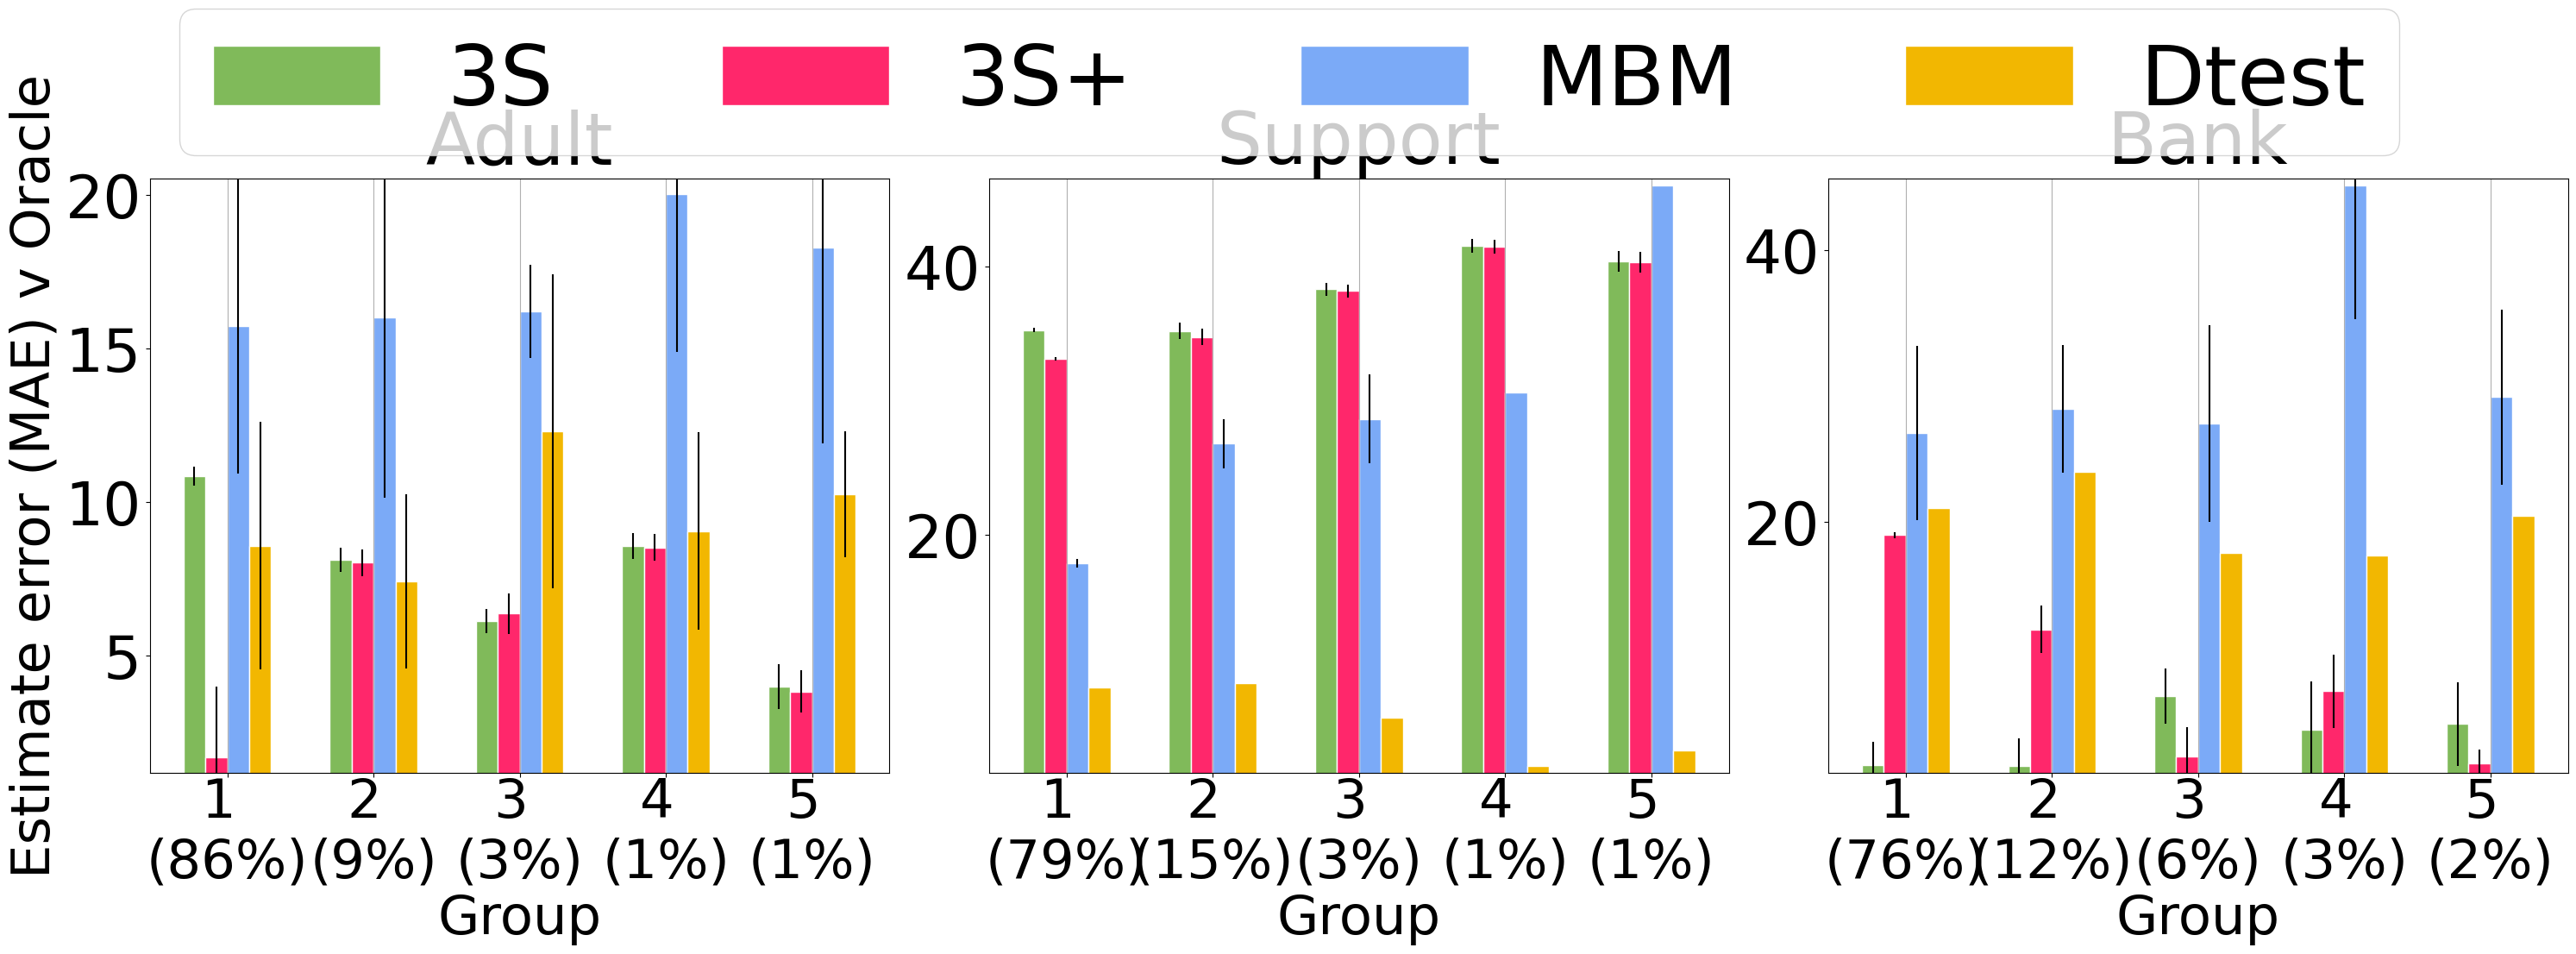

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

models = [
    "rf",
    # "mlp",
    # "gbc",
    # "ada",
    # "knn",
    # "lr",
    # "dt",
]

for model in models:
    metrics = ["acc"]
    for metric in metrics:
        try:
            # Adult
            df1 = pd.read_csv(f"../results/adult_{model}_{metric}.csv")[
                ["Group", "3S", "3S+", "MBM", "Dtest"]
            ]

            # Support
            df4 = pd.read_csv(f"../results/support_{model}_{metric}.csv")[
                ["Group", "3S", "3S+", "BLM", "Dtest"]
            ]
            df4.rename(columns={"BLM": "MBM"}, inplace=True)

            # Bank
            df5 = pd.read_csv(f"../results/bank_{model}_{metric}.csv")[
                ["Group", "3S", "3S+", "MBM", "Dtest"]
            ].iloc[0:5, :]

            # STD files
            df1s = pd.read_csv(f"../results/adult_std_{model}_{metric}.csv")[
                ["Group", "3S", "3S+", "MBM", "Dtest"]
            ]

            df4s = pd.read_csv(f"../results/support_std_{model}_{metric}.csv")[
                ["Group", "3S", "3S+", "BLM", "Dtest"]
            ]
            df4s.rename(columns={"BLM": "MBM"}, inplace=True)

            df5s = pd.read_csv(f"../results/bank_std_{model}_{metric}.csv")[
                ["Group", "3S", "3S+", "MBM", "Dtest"]
            ].iloc[0:5, :]

            # List of dataframes (Covid & Drug removed)
            dataframes = [df1, df4, df5]
            df_stds = [df1s, df4s, df5s]

            # Method names
            methods = ["3S", "3S+", "MBM", "Dtest"]
            colors = ["#80BA5A", "#FF276B", "#7BAAF7", "#F2B701"]

            # Datasets (Covid & Drug removed)
            datasets = ["Adult", "Support", "Bank"]
            alphas = [1, 1, 1, 1]

            # Set the bar width and positions
            bar_width = 0.15
            fs = 16

            # Create the subplots in a row
            fig, axes = plt.subplots(
                nrows=1, ncols=len(dataframes), figsize=(10 * len(dataframes), 10)
            )
            bar_artists = {}

            # Create the grouped bar plot for each dataframe
            for i, (df, df_std) in enumerate(zip(dataframes, df_stds)):
                # Extract the group labels and values for the current dataframe
                groups = df["Group"]
                df[["3S", "3S+", "MBM", "Dtest"]] = df[
                    ["3S", "3S+", "MBM", "Dtest"]
                ].astype(float)
                df_std[["3S", "3S+", "MBM", "Dtest"]] = df_std[
                    ["3S", "3S+", "MBM", "Dtest"]
                ].astype(float)
                values = np.array([df[method] for method in methods])
                std_values = np.array([df_std[method] for method in methods])

                min_value = df[["3S", "3S+", "MBM", "Dtest"]].min().min()
                max_value = df[["3S", "3S+", "MBM", "Dtest"]].max().max()

                positions = np.arange(len(df["Group"]))

                # Create the grouped bar plot
                ax = axes[i]
                ax.set_title(datasets[i], fontsize=60)

                for j, method in enumerate(methods):
                    ax.bar(
                        positions + j * bar_width,
                        values[j],
                        width=bar_width,
                        label=method,
                        color=colors[j],
                        alpha=alphas[j],
                    )

                    # Plot the error bars representing standard deviations
                    ax.errorbar(
                        positions + j * bar_width,
                        values[j],
                        yerr=std_values[j],
                        fmt="none",
                        color="black",
                        capsize=0,
                    )

                # Set the x-axis labels
                ax.set_xticks(positions + (len(methods) - 1) * bar_width / 2)
                ax.tick_params(axis="x", which="major", pad=0.1)

                ax.set_xticklabels(groups, fontsize=45)
                ax.set_xticklabels(
                    [
                        label.get_text().replace("(", "\n(")
                        for label in ax.get_xticklabels()
                    ]
                )  # Add line break

                # Set the y-axis label
                if i == 0:
                    ax.set_ylabel("Estimate error (MAE) v Oracle", fontsize=45)

                ax.set_xlabel("Group", fontsize=45)
                ax.yaxis.set_tick_params(labelsize=50)

                min_value -= 0.5
                max_value += 0.5
                if min_value < 0:
                    min_value = 0
                if max_value > 100:
                    max_value = 100

                ax.grid(axis="x")
                # Set the y-axis limits
                ax.set_ylim(min_value, max_value)

                for j, method in enumerate(methods):
                    bar_artist = ax.bar(
                        positions + j * bar_width,
                        values[j],
                        width=bar_width,
                        label=method,
                        color=colors[j],
                        alpha=alphas[j],
                        edgecolor="white",
                    )
                    if method not in bar_artists:
                        bar_artists[method] = bar_artist

            # Adjust spacing between subplots
            plt.tight_layout()

            # Create the legend for the bars only
            legend_handles = [bar_artists[method][0] for method in methods]
            legend_labels = ["3S", "3S+", "MBM", "Dtest"]
            fig.legend(
                legend_handles,
                legend_labels,
                loc="upper center",
                bbox_to_anchor=(0.5, 1.15),
                ncol=len(methods),
                fontsize=70,
            )

            plt.savefig(
                "subgroups.pdf",
                bbox_inches="tight",
                pad_inches=0.1,
            )

            # Show the plot
            plt.show()

        except Exception as e:
            import traceback
            print(traceback.format_exc())
            print(e)


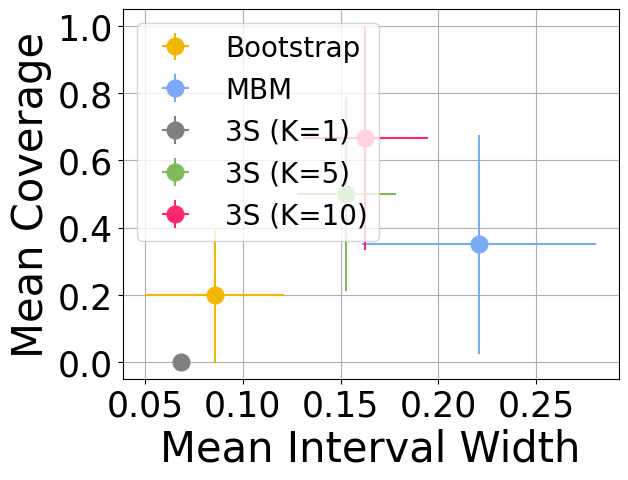

In [9]:
import matplotlib.pyplot as plt
import pandas as pd  # in case not already imported

model = "rf"
folder = "../results"

# ====== COVERAGE ======
metric = "coverage"

df1 = (
    pd.read_csv(f"{folder}/{metric}_adult_{model}.csv").set_index("Unnamed: 0").T
)
# covid removed
df3 = (
    pd.read_csv(f"{folder}/{metric}_bank_{model}.csv").set_index("Unnamed: 0").T
)
# drug removed
df5 = (
    pd.read_csv(f"{folder}/{metric}_support_{model}.csv").set_index("Unnamed: 0").T
)

coverage_df = pd.concat([df1, df3, df5], ignore_index=True).rename(
    columns={"Unnamed: 0": "dataset"}
)

mydf = coverage_df
mydf = mydf.reset_index()
mydf = mydf.melt(id_vars="index", var_name="method", value_name="coverage")
mydf = mydf.rename(columns={"index": "dataset"})
mean_coverage = mydf.groupby("method")["coverage"].mean()
coverage_sem = mydf.groupby("method")["coverage"].sem()

# ====== WIDTH ======
metric = "width"

df1 = (
    pd.read_csv(f"{folder}/{metric}_adult_{model}.csv").set_index("Unnamed: 0").T
)
# covid removed
df3 = (
    pd.read_csv(f"{folder}/{metric}_bank_{model}.csv").set_index("Unnamed: 0").T
)
# drug removed
df5 = (
    pd.read_csv(f"{folder}/{metric}_support_{model}.csv").set_index("Unnamed: 0").T
)

coverage_df = pd.concat([df1, df3, df5], ignore_index=True).rename(
    columns={"Unnamed: 0": "dataset"}
)
mydf = coverage_df
mydf = mydf.reset_index()
mydf = mydf.melt(id_vars="index", var_name="method", value_name="width")
mydf = mydf.rename(columns={"index": "dataset"})
mean_width = mydf.groupby("method")["width"].mean()
width_sem = mydf.groupby("method")["width"].sem()

# Get unique methods and assign colors
methods = [
    "test",
    "MBM",
    "synth",
    "synth2",
    "synth3",
]

colors = [
    "#F2B701",
    "#7BAAF7",
    "gray",
    "#80BA5A",
    "#FF276B",
]

names = ["Bootstrap", "MBM", "3S (K=1)", "3S (K=5)", "3S (K=10)"]

# Plot dots with error bars
for i, method in enumerate(methods):
    plt.errorbar(
        mean_width[method],
        mean_coverage[method],
        xerr=width_sem[method],
        yerr=coverage_sem[method],
        fmt="o",
        color=colors[i],
        label=names[i],
        markersize=12,
    )

# Customize the plot
plt.xlabel("Mean Interval Width", fontsize=30)
plt.ylabel("Mean Coverage", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(True)

# Add a legend
plt.legend(loc=2, fontsize=20)

# Show the plot
plt.show()
